## Steps to implement YOLO v3

1. Clone repo and install dependencies
2. Update the architecture file based on the dataset 
3. Load and Preprocess Data

4. Arrange Data in required format
5. Train the model


## 1. Installing Required Libraries

In [ ]:
# download the library ultralytics
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 9295 (delta 8), reused 18 (delta 5), pack-reused 9268
Receiving objects: 100% (9295/9295), 7.18 MiB | 10.08 MiB/s, done.
Resolving deltas: 100% (6387/6387), done.


## 2. Update Architecture file as per dataset

In [ ]:
# go to folder yolov3
%cd yolov3

/content/yolov3


In [ ]:
# moving the uploaded file to desired location 
%mv /content/yolov3.cfg /content/yolov3/cfg/yolov3.cfg

## 3. Loading Dataset from Drive

In [ ]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# unzip data
!unzip /content/drive/My\ Drive/train_zedkk38.zip

Archive:  /content/drive/My Drive/train_zedkk38.zip
   creating: images/
  inflating: images/0.jpg            
  inflating: images/1.jpg            
  inflating: images/10.jpg           
  inflating: images/100.jpg          
  inflating: images/101.jpg          
  inflating: images/102.jpg          
  inflating: images/103.jpg          
  inflating: images/104.jpg          
  inflating: images/105.jpg          
  inflating: images/106.jpg          
  inflating: images/107.jpg          
  inflating: images/108.jpg          
  inflating: images/109.jpg          
  inflating: images/11.jpg           
  inflating: images/110.jpg          
  inflating: images/111.jpg          
  inflating: images/112.jpg          
  inflating: images/113.jpg          
  inflating: images/114.jpg          
  inflating: images/115.jpg          
  inflating: images/116.jpg          
  inflating: images/117.jpg          
  inflating: images/118.jpg          
  inflating: images/119.jpg          
  inflating: im

## Loading and Cleaning Data

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd

from PIL import Image

In [ ]:
# reading train file 
train = pd.read_csv('train.csv')

In [ ]:
# data cleaning

## keeping WBC and RBC only
train['cell_type'] = train['cell_type'].replace({'RBC': 0, 'WBC': 1})
train = train.loc[(train['cell_type'] == 0) | (train['cell_type'] == 1)]

In [ ]:
train.head()

,image_names,cell_type,xmin,xmax,ymin,ymax
0,1.jpg,0,68,165,154,249
1,1.jpg,0,1,66,145,260
2,1.jpg,0,207,334,160,270
3,1.jpg,0,435,540,347,437
4,1.jpg,0,535,639,356,464


## 4. Converting Data Files into Required Structure

In [ ]:
# creating folder for labels
!mkdir labels

In [ ]:
# loading data

for image_name in train.image_names.unique():

    # separate labels for each image
    image_metadata = train[train.image_names == image_name].copy()

    # x-center, y-center, height and width for bounding box
    image_metadata['x_center'] = (image_metadata['xmax'] + image_metadata['xmin']) / 2
    image_metadata['y_center'] = (image_metadata['ymax'] + image_metadata['ymin']) / 2
    image_metadata['width'] = (image_metadata['xmax'] - image_metadata['xmin'])
    image_metadata['height'] = (image_metadata['ymax'] - image_metadata['ymin'])

    im_width, im_height = Image.open('images/' + image_name).size

    # normalizing bounding box values
    image_metadata['x_center'] = image_metadata['x_center']/im_width
    image_metadata['width'] = image_metadata['width']/im_width
    image_metadata['y_center'] = image_metadata['y_center']/im_height
    image_metadata['height'] = image_metadata['height']/im_height

    image_metadata[['cell_type', 'x_center', 'y_center', 'width', 'height']].to_csv('labels/' + image_name.split('.')[0] + '.txt', index=False, header=None, sep=" ")

In [ ]:
# file containing train image names
bloodCellDet_train = train.image_names.apply(lambda x: '/content/yolov3/images/' + x).unique()
np.savetxt("bloodCellDet_train.txt", bloodCellDet_train, fmt="%s")

In [ ]:
# print content of the file 
!cat bloodCellDet_train.txt

/content/yolov3/images/1.jpg
/content/yolov3/images/2.jpg
/content/yolov3/images/4.jpg
/content/yolov3/images/6.jpg
/content/yolov3/images/8.jpg
/content/yolov3/images/10.jpg
/content/yolov3/images/11.jpg
/content/yolov3/images/12.jpg
/content/yolov3/images/13.jpg
/content/yolov3/images/14.jpg
/content/yolov3/images/18.jpg
/content/yolov3/images/19.jpg
/content/yolov3/images/20.jpg
/content/yolov3/images/21.jpg
/content/yolov3/images/23.jpg
/content/yolov3/images/26.jpg
/content/yolov3/images/27.jpg
/content/yolov3/images/28.jpg
/content/yolov3/images/29.jpg
/content/yolov3/images/31.jpg
/content/yolov3/images/32.jpg
/content/yolov3/images/34.jpg
/content/yolov3/images/35.jpg
/content/yolov3/images/36.jpg
/content/yolov3/images/37.jpg
/content/yolov3/images/38.jpg
/content/yolov3/images/40.jpg
/content/yolov3/images/41.jpg
/content/yolov3/images/43.jpg
/content/yolov3/images/44.jpg
/content/yolov3/images/47.jpg
/content/yolov3/images/48.jpg
/content/yolov3/images/49.jpg
/content/yolov3

In [ ]:
# file containing validation names
bloodCellDet_val = train.image_names.apply(lambda x: '/content/yolov3/images/' + x).unique()
np.savetxt("bloodCellDet_val.txt", bloodCellDet_val, fmt="%s")

In [ ]:
# print content of the file 
!cat bloodCellDet_val.txt

/content/yolov3/images/1.jpg
/content/yolov3/images/2.jpg
/content/yolov3/images/4.jpg
/content/yolov3/images/6.jpg
/content/yolov3/images/8.jpg
/content/yolov3/images/10.jpg
/content/yolov3/images/11.jpg
/content/yolov3/images/12.jpg
/content/yolov3/images/13.jpg
/content/yolov3/images/14.jpg
/content/yolov3/images/18.jpg
/content/yolov3/images/19.jpg
/content/yolov3/images/20.jpg
/content/yolov3/images/21.jpg
/content/yolov3/images/23.jpg
/content/yolov3/images/26.jpg
/content/yolov3/images/27.jpg
/content/yolov3/images/28.jpg
/content/yolov3/images/29.jpg
/content/yolov3/images/31.jpg
/content/yolov3/images/32.jpg
/content/yolov3/images/34.jpg
/content/yolov3/images/35.jpg
/content/yolov3/images/36.jpg
/content/yolov3/images/37.jpg
/content/yolov3/images/38.jpg
/content/yolov3/images/40.jpg
/content/yolov3/images/41.jpg
/content/yolov3/images/43.jpg
/content/yolov3/images/44.jpg
/content/yolov3/images/47.jpg
/content/yolov3/images/48.jpg
/content/yolov3/images/49.jpg
/content/yolov3

In [ ]:
# create file with class names
with open('bloodCellDet.names', 'w') as f:
    f.write('RBC\nWBC')

In [ ]:
!cat bloodCellDet.names

RBC
WBC

In [ ]:
# data file with class count and paths
with open('bloodCellDet.data', 'w') as f:
    f.write('classes=2\ntrain=/content/yolov3/bloodCellDet_train.txt\nvalid=/content/yolov3/bloodCellDet_val.txt\nnames=/content/yolov3/bloodCellDet.names')

In [ ]:
!cat bloodCellDet.data

classes=2
train=/content/yolov3/bloodCellDet_train.txt
valid=/content/yolov3/bloodCellDet_val.txt
names=/content/yolov3/bloodCellDet.names

## Training the Model

In [ ]:
!python3 train.py --weights yolov3.pt --cfg yolov3.cfg --data /content/yolov3/bloodCellDet.data --img-size 320 --epochs 15 

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./cfg/yolov3.cfg', data='/content/yolov3/bloodCellDet.data', device='', epochs=15, evolve=False, img_size=[320], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-06-21 16:32:58.770464: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 222 layers, 6.15291e+07 parameters, 6.15291e+07 gradients
Optimizer groups: 75 .bias, 75 Conv2d.weight, 72 other
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408  

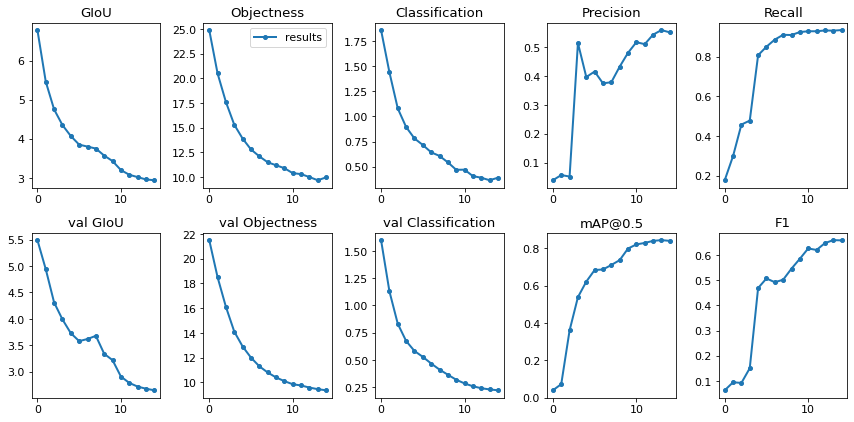

In [ ]:
from utils import utils
utils.plot_results()

In [ ]:
# random image
!cp images/1.jpg data/samples/

In [ ]:
# inference
!python3 detect.py --weights "weights/best.pt" --cfg "cfg/yolov3.cfg" --names "bloodCellDet.names"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='bloodCellDet.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla K80', total_memory=11441MB)

Model Summary: 222 layers, 6.15291e+07 parameters, 6.15291e+07 gradients
image 1/3 data/samples/1.jpg: 384x512 24 RBCs, 1 WBCs, Done. (0.077s)
image 2/3 data/samples/bus.jpg: 512x384 4 RBCs, Done. (0.065s)
image 3/3 data/samples/zidane.jpg: 320x512 1 RBCs, Done. (0.063s)
Results saved to /content/yolov3/output
Done. (0.445s)
